# Frequency and Word cloud

In [16]:
from wordcloud import WordCloud
import numpy as np 
import pandas as pd
import neattext.functions as nfx
from tqdm import tqdm

import matplotlib.pyplot as plt
import re
import os
import pandas as pd
import numpy as np

#processing libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

#ML libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

import gensim

In [2]:
data=pd.read_csv('Suicide_Detection.csv')
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [3]:
data['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

## Data Cleaning and Preprocessing

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/zhengyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
#change the text content into lower
data['text']=data['text'].str.lower()

# change the content in our taget variable(class) into 0 and 1(For building models in the later steps)
# 0 for non-suicide, 1 for suicide
# replace the values in the 'class' column
data['class'] = data['class'].map({'suicide': 1, 'non-suicide': 0})
data.head()

,Unnamed: 0,text,class
0,2,ex wife threatening suiciderecently i left my ...,1
1,3,am i weird i don't get affected by compliments...,0
2,4,finally 2020 is almost over... so i can never ...,0
3,8,i need helpjust help me im crying so hard,1
4,9,"i’m so losthello, my name is adam (16) and i’v...",1


In [17]:
# remove non alphabets
remove_non_alphabets = lambda x: re.sub(r'[^a-zA-Z]',' ',x)
# tokenization
tokenize = lambda x: word_tokenize(x)
# stemming
ps = PorterStemmer()
stem = lambda w: [ ps.stem(x) for x in w ]
# lemmatization
lemmatizer = WordNetLemmatizer()
leammtizer = lambda x: [ lemmatizer.lemmatize(word) for word in x ]

In [18]:
# apply all the methods above to the column Message
print('Processing : [=', end='')
data['text'] = data['text'].apply(remove_non_alphabets)
print('=', end='')
data['text'] = data['text'].apply(tokenize)
print('=', end='')
data['text'] = data['text'].apply(stem)
print('=', end='')
data['text'] = data['text'].apply(leammtizer)
print('=', end='')
data['text'] = data['text'].apply(lambda x: ' '.join(x))
print('] : Completed', end='')

Processing : [=====] : Completed

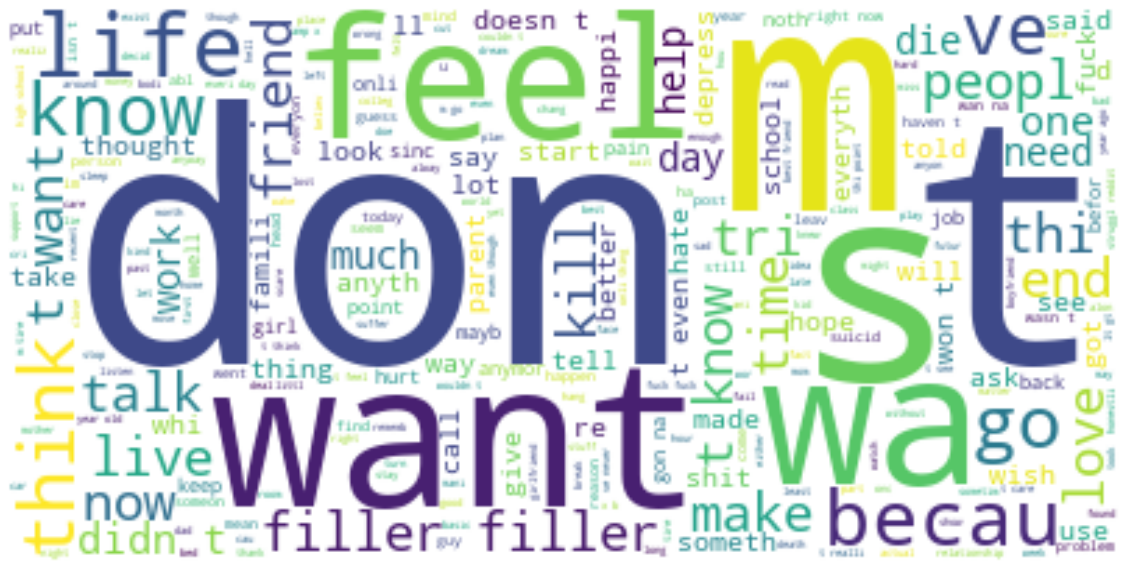

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 假设您的数据框名为 data
processed_texts = data['text']

# 将处理过的文本连接成一个长字符串
long_string = ' '.join(processed_texts)

# 生成词云
wc = WordCloud(max_words=400, background_color='white')
wc.generate(long_string)

# 显示词云
plt.figure(figsize=(20, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


## Create a custom stopwords list

In [26]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import neattext.functions as nfx

In [39]:
# delete meaningless words
custom_stopwords = ['thi', 'wa', 'becaus', 'onli', 'realli', 'want', 'like', 'know', 'time', 'think','year','tri','thing','day','filler','na','got','u','guy','reddit']

def remove_custom_stopwords(text, stopwords_list):
    words = text.split()
    cleaned_words = [word for word in words if word not in stopwords_list]
    cleaned_text = " ".join(cleaned_words)
    return cleaned_text


In [46]:

data["text"]=data["text"].apply(lambda x: remove_custom_stopwords(x, custom_stopwords))

In [47]:
class_1_data = data[data["class"] == 1]
class_0_data = data[data["class"] == 0]

## Suicidal thoughts (class=1)

In [48]:
cleaned_text_1 = class_1_data["text"].apply(lambda x: nfx.remove_stopwords(x))
words_1 = " ".join(cleaned_text_1.values)
word_counts_1 = Counter(words_1.split())
top_words_1 = word_counts_1.most_common(25)
top_words_1

[('feel', 150086),
 ('life', 113258),
 ('peopl', 73543),
 ('friend', 70930),
 ('live', 63512),
 ('fuck', 63028),
 ('suicid', 58426),
 ('help', 57140),
 ('kill', 50296),
 ('die', 49485),
 ('end', 48673),
 ('ha', 44996),
 ('thought', 43957),
 ('work', 43919),
 ('talk', 43836),
 ('love', 43236),
 ('anymor', 42294),
 ('way', 41613),
 ('depress', 40987),
 ('whi', 39437),
 ('ani', 39012),
 ('need', 38773),
 ('anyth', 38006),
 ('famili', 37933),
 ('everyth', 37080)]

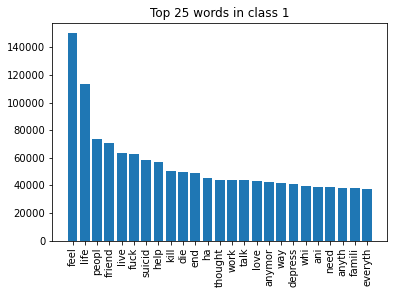

In [49]:
x_1 = [w[0] for w in top_words_1]
y_1 = [w[1] for w in top_words_1]
plt.bar(x_1, y_1)
plt.xticks(rotation=90)
plt.title("Top 25 words in class 1")
plt.show()

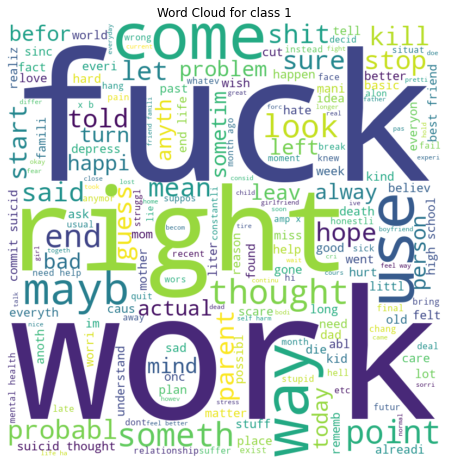

In [50]:
wc_1 = WordCloud(width=800, height=800, background_color="white", max_words=200, relative_scaling=0.5, normalize_plurals=False).generate(words_1)
plt.figure(figsize=[8,8])
plt.imshow(wc_1, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for class 1")
plt.show()

## Non suicidal thoughts (class=0)

In [51]:
cleaned_text_0 = class_0_data["text"].apply(lambda x: nfx.remove_stopwords(x))
words_0 = " ".join(cleaned_text_0.values)
word_counts_0 = Counter(words_0.split())
top_words_0 = word_counts_0.most_common(25)
top_words_0

[('fuck', 32416),
 ('peopl', 22344),
 ('friend', 21796),
 ('feel', 21509),
 ('talk', 16452),
 ('school', 15108),
 ('girl', 14448),
 ('post', 14080),
 ('whi', 13760),
 ('need', 13154),
 ('good', 12977),
 ('help', 12286),
 ('im', 11713),
 ('ask', 11489),
 ('ha', 11456),
 ('someth', 11383),
 ('mom', 11380),
 ('start', 11267),
 ('someon', 11021),
 ('look', 10882),
 ('anyon', 10663),
 ('hi', 10631),
 ('ani', 10583),
 ('said', 10396),
 ('love', 10338)]

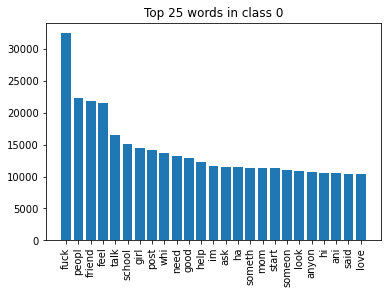

In [52]:
x_0 = [w[0] for w in top_words_0]
y_0 = [w[1] for w in top_words_0]
plt.bar(x_0, y_0)
plt.xticks(rotation=90)
plt.title("Top 25 words in class 0")
plt.show()

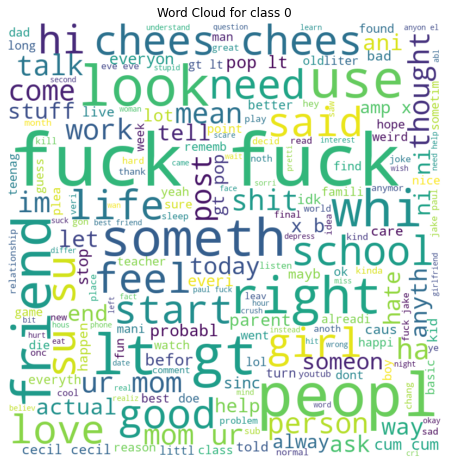

In [53]:
wc_0 = WordCloud(width=800, height=800, background_color="white", max_words=200, relative_scaling=0.5, normalize_plurals=False).generate(words_0)
plt.figure(figsize=[8,8])
plt.imshow(wc_0, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for class 0")
plt.show()